In [ ]:
#Installation of libraries 
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing 
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
# data set to dataframe 
data=pd.read_csv('Orange_Telecom_Churn_Data.csv')
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# dropping some unwanted colums 
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [4]:
data.columns # cheking cloums of datasets

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

<p> In Data set we can see that dataset has data in diffrent datatypes . So we should convert them in float or Integer so we will give them dummy label so it can be fit in model for traing and testing</p>

In [5]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [6]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [7]:
x_cols = [x for x in data.columns if x != 'churned'] #filltering cloumns that dont contain the label
x = data[x_cols]  #indepent variables
y = data['churned'] #dependent variables




<b>Model training and testing </b>

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('dimensions of x_train = {}  Dimensions of y_train = {} Dimensions of x_test = {} Dimension of y_test = {} '.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))
#here we are cheking diamensions of train and test data so we can chose values for K

dimensions of x_train = (4000, 17)  Dimensions of y_train = (4000,) Dimensions of x_test = (1000, 17) Dimension of y_test = (1000,) 


In [9]:
# here we are taking random k for testing 
k=3
model_3=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
model_3

KNeighborsClassifier(n_neighbors=3)

In [10]:
#prediction of output 
y_predict_model_3=model_3.predict(x_test)


In [17]:
print("Train set Accuracy for k=3: ", metrics.accuracy_score(y_train, model_3.predict(x_train)))
print("Test set Accuracy for k=3: ", metrics.accuracy_score(y_test, y_predict_model_3))

Train set Accuracy for k=3:  0.93925
Test set Accuracy for k=3:  0.892


<p> Now here we are finding that which k is for model accuracy we can take minimum k=1 and maximum k = no. of dimension of train_data set </p>
<p> Here max train_dimention is 4000 which is 80% of data set and train_dimension is 1000 which is 20% of test set so here maximum k is 4000  you can also use your percentage of train_data and test_data</p> 

In [11]:
Ks=40 #800 #100  # max K= 800 because data has total 800 records 
mean_accuaracy = np.zeros((Ks-1))
#print(mean_accuaracy)
std_accuaracy=np.zeros((Ks-1))
Confustion_Matrix = []
for n in range (1,Ks):
    model=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    y_predict=model.predict(x_test)
    mean_accuaracy[n-1]=metrics.accuracy_score(y_test,y_predict)
    std_accuaracy[n-1]=np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])
mean_accuaracy    

array([0.876, 0.897, 0.892, 0.893, 0.899, 0.895, 0.895, 0.884, 0.895,
       0.89 , 0.898, 0.893, 0.898, 0.89 , 0.894, 0.892, 0.894, 0.891,
       0.892, 0.889, 0.894, 0.888, 0.892, 0.887, 0.889, 0.89 , 0.891,
       0.89 , 0.889, 0.888, 0.887, 0.887, 0.888, 0.886, 0.889, 0.886,
       0.887, 0.885, 0.888])

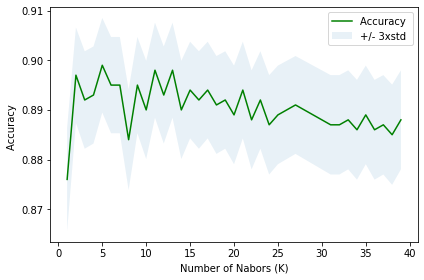

In [12]:
# here we created visulation about it that K vs Accuracy graph
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
plt.plot(range(1,Ks),mean_accuaracy,'g')
plt.fill_between(range(1,Ks),mean_accuaracy-1 * std_accuaracy,mean_accuaracy +1 * std_accuaracy,alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [13]:
# here we find best k for best accuracy
print( "The best accuracy was with", mean_accuaracy.max(), "with k=", mean_accuaracy.argmax()+1) 

The best accuracy was with 0.899 with k= 5
